In [26]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_covid = pd.read_csv('data\covid19_states_humidityandcases.csv')

In [27]:
# look at basic info on the variables in our dataframe
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          51 non-null     object 
 1   TotalCases        51 non-null     object 
 2   NewCases          51 non-null     object 
 3   TotalDeaths       51 non-null     object 
 4   NewDeaths         51 non-null     float64
 5   ActiveCases       51 non-null     object 
 6   Average Humidity  51 non-null     object 
 7   Population        51 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [28]:
# Write function to clean data
def cleanNumeric(df, exclude):
    
    df2 = df.copy()
    
    for col in df2.columns:
        df2[col] = df2[col].astype(str)  # cast to string
        df2[col] = df2[col].str.replace(',', '').str.replace('%','').str.replace('+','')

        if col not in exclude:
            df2[col] = df2[col].astype(float)  # cast to float
            
    return df2

df_covid = cleanNumeric(df_covid, ['USAState'])

In [29]:
# check variable set up
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          51 non-null     object 
 1   TotalCases        51 non-null     float64
 2   NewCases          51 non-null     float64
 3   TotalDeaths       51 non-null     float64
 4   NewDeaths         51 non-null     float64
 5   ActiveCases       51 non-null     float64
 6   Average Humidity  51 non-null     float64
 7   Population        51 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [30]:
# check first few rows
df_covid.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population
0,new york,"426,807.00",0.00,"32,393.00",0.00,"216,906.00",75.60,"19,594,330.00"
1,california,"319,985.00",0.00,"7,030.00",4.00,"227,398.00",80.36,"38,066,920.00"
2,florida,"269,811.00","15,300.00","4,242.00",45.00,"232,919.00",77.05,"19,361,792.00"
3,texas,"259,465.00",0.00,"3,228.00",0.00,"128,357.00",76.95,"26,092,033.00"
4,new jersey,"180,672.00",0.00,"15,603.00",0.00,"88,899.00",71.31,"8,874,374.00"


In [31]:
def divideDf (df, col1, col2):
    
    df2 = df.copy()
    
    colNew = col1 + '%'
    df2[colNew] = df2[col1]/df2[col2] * 100
    
    return df2

In [32]:
df_covid = divideDf(df_covid, 'TotalCases', 'Population')
df_covid = divideDf(df_covid, 'TotalDeaths', 'Population')
df_covid = divideDf(df_covid, 'ActiveCases', 'Population')

df_covid

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
0,new york,"426,807.00",0.00,"32,393.00",0.00,"216,906.00",75.60,"19,594,330.00",2.18,0.17,1.11
1,california,"319,985.00",0.00,"7,030.00",4.00,"227,398.00",80.36,"38,066,920.00",0.84,0.02,0.60
2,florida,"269,811.00","15,300.00","4,242.00",45.00,"232,919.00",77.05,"19,361,792.00",1.39,0.02,1.20
3,texas,"259,465.00",0.00,"3,228.00",0.00,"128,357.00",76.95,"26,092,033.00",0.99,0.01,0.49
4,new jersey,"180,672.00",0.00,"15,603.00",0.00,"88,899.00",71.31,"8,874,374.00",2.04,0.18,1.00
5,illinois,"154,094.00",0.00,"7,369.00",0.00,"31,278.00",76.94,"12,868,747.00",1.20,0.06,0.24
6,arizona,"122,467.00","2,537.00","2,237.00",86.00,"105,836.00",79.40,"6,561,516.00",1.87,0.03,1.61
7,georgia,"114,401.00",0.00,"2,996.00",0.00,"93,715.00",75.76,"9,907,756.00",1.15,0.03,0.95
8,massachusetts,"111,398.00",0.00,"8,310.00",0.00,"8,741.00",75.08,"6,657,291.00",1.67,0.12,0.13
9,pennsylvania,"99,478.00",249.00,"6,958.00",5.00,"19,610.00",78.11,"12,758,729.00",0.78,0.05,0.15


In [33]:
# check out summary statistics for our dataframe
df_covid.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,"64,712.25",466.45,"2,648.53",3.20,"33,430.45",77.57,"6,158,962.43",0.91,0.04,0.43
std,"87,206.03","2,177.04","5,138.89",13.48,"56,186.00",2.40,"6,981,324.84",0.50,0.04,0.40
min,"1,200.00",0.00,17.00,0.00,174.00,71.31,"575,251.00",0.09,0.00,0.02
25%,"12,297.00",0.00,289.50,0.00,"5,106.50",75.81,"1,726,672.50",0.57,0.01,0.13
50%,"35,419.00",0.00,951.00,0.00,"11,746.00",77.14,"4,383,272.00",0.86,0.02,0.30
75%,"74,739.50",21.00,"3,018.50",0.00,"26,859.00",79.45,"6,778,207.00",1.17,0.04,0.58
max,"426,807.00","15,300.00","32,393.00",86.00,"232,919.00",82.01,"38,066,920.00",2.18,0.18,1.61


In [34]:
# Add a column with label for humidity level grouping

# create a list of our conditions
conditions = [
    (df_covid['Average Humidity'] <= 75.81),
    (df_covid['Average Humidity'] <= 77.14) & (df_covid['Average Humidity'] > 75.81),
    (df_covid['Average Humidity'] <= 79.45) & (df_covid['Average Humidity'] > 77.14),
    (df_covid['Average Humidity'] > 79.45)
    ]

# create a list of the values we want to assign for each condition
values = ['0-Low', '1-Med-low', '2-Med-high', '3-High']

# create a new column and use np.select to assign values to it using our lists as arguments
df_covid['Humidity level'] = np.select(conditions, values)
df_covid.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%,Humidity level
0,new york,"426,807.00",0.00,"32,393.00",0.00,"216,906.00",75.60,"19,594,330.00",2.18,0.17,1.11,0-Low
1,california,"319,985.00",0.00,"7,030.00",4.00,"227,398.00",80.36,"38,066,920.00",0.84,0.02,0.60,3-High
2,florida,"269,811.00","15,300.00","4,242.00",45.00,"232,919.00",77.05,"19,361,792.00",1.39,0.02,1.20,1-Med-low
3,texas,"259,465.00",0.00,"3,228.00",0.00,"128,357.00",76.95,"26,092,033.00",0.99,0.01,0.49,1-Med-low
4,new jersey,"180,672.00",0.00,"15,603.00",0.00,"88,899.00",71.31,"8,874,374.00",2.04,0.18,1.00,0-Low


In [35]:
# How do our metrics compare for states in different humidity buckets? Check out medians

pd.options.display.float_format = "{:,.2f}".format
dfHumid_med = df_covid.groupby('Humidity level').median()
dfHumid_med

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
Humidity level,,,,,,,,,,
0-Low,"73,109.00",0.00,"2,996.00",0.00,"24,833.00",74.85,"5,887,776.00",1.19,0.06,0.57
1-Med-low,"51,079.00",0.00,"1,121.00",0.00,"13,177.00",76.91,"5,724,692.00",0.86,0.02,0.30
2-Med-high,"27,791.50",0.00,"1,046.50",0.00,"15,869.50",78.28,"3,237,499.50",0.88,0.02,0.33
3-High,"7,454.00",0.00,114.00,0.00,875.00,80.54,"1,328,535.00",0.61,0.01,0.10


In [36]:
# How do our metrics compare for states in different humidity buckets? Check out means

dfHumid_mean = df_covid.groupby('Humidity level').mean()
dfHumid_mean

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
Humidity level,,,,,,,,,,
0-Low,"96,421.69",49.38,"5,846.85",0.69,"46,387.54",74.60,"6,518,650.62",1.27,0.06,0.58
1-Med-low,"81,761.00","1,515.08","1,922.08",4.31,"42,783.31",76.76,"8,246,037.77",0.82,0.02,0.37
2-Med-high,"41,840.75",241.08,"1,828.00",7.58,"21,832.33",78.45,"4,870,074.42",0.99,0.04,0.59
3-High,"37,066.23",42.92,934.08,0.54,"21,826.46",80.54,"4,901,941.69",0.56,0.01,0.20


The available variables to plot are: 
TotalCases
NewCases
TotalDeaths
NewDeaths
ActiveCases
Average Humidity
Population
TotalCases%
TotalDeaths%
ActiveCases%
Humidity level
What variable would you like for the x axis? Average Humidity
What variable would you like for the y axis? TotalCases%


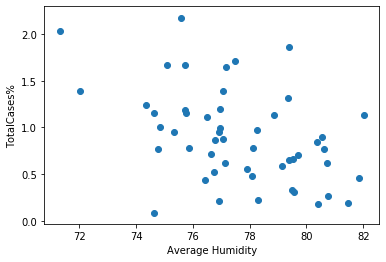

In [37]:
# Data Visualization

# Part one: user input

def getInput(prompt):
    userInput = input(prompt)
    error = "Sorry that variable is not available. Please try again."
    
    if userInput not in df_covid.columns:
        print(error)
        userInput = getInput(prompt)
        return userInput
        
    else:
        return userInput

# Print out variable list excluding labels
print("The available variables to plot are: ")
for v in df_covid.columns[1:]: print(v)

# Get user input for variables to plot
x = getInput("What variable would you like for the x axis? ")
y = getInput("What variable would you like for the y axis? ")

# Make scatterplot
plt.scatter(df_covid[x],df_covid[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

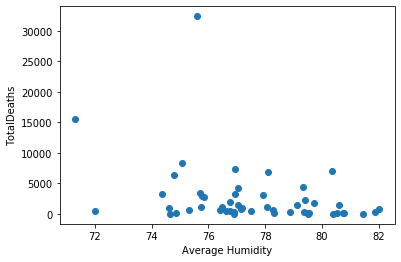

In [38]:
# Make scatterplot of total deaths vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalDeaths'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalDeaths')
plt.show()

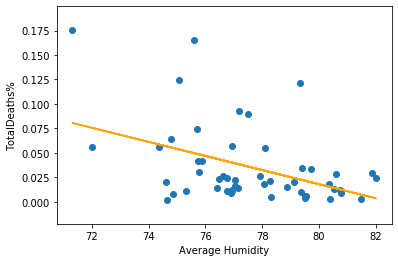

In [39]:
# Make scatterplot of total deaths vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalDeaths%'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalDeaths%')
m, b = np.polyfit(df_covid['Average Humidity'],df_covid['TotalDeaths%'], 1)
plt.plot(df_covid['Average Humidity'], m*df_covid['Average Humidity'] + b, color="orange")
plt.show()

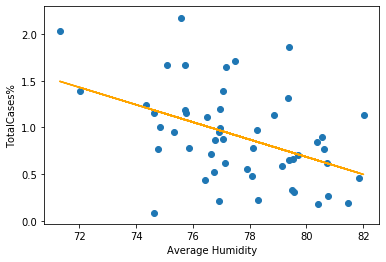

In [40]:
# Make scatterplot of total cases vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalCases%'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalCases%')
m, b = np.polyfit(df_covid['Average Humidity'],df_covid['TotalCases%'], 1)
plt.plot(df_covid['Average Humidity'], m*df_covid['Average Humidity'] + b, color="orange")
plt.show()

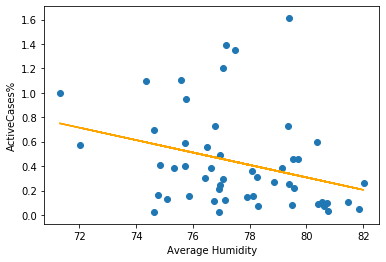

In [41]:
# Make scatterplot of total cases vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['ActiveCases%'])
plt.xlabel('Average Humidity')
plt.ylabel('ActiveCases%')
m, b = np.polyfit(df_covid['Average Humidity'],df_covid['ActiveCases%'], 1)
plt.plot(df_covid['Average Humidity'], m*df_covid['Average Humidity'] + b, color="orange")
plt.show()